## Project Objective

This project will attempt to accomplish the following:

* Understand the trends over time in gross domestic product (GDP) and life expectancy at birth of 6 selected countries.
* Identify the relationship between the GDP and life expectancy of six countries.



#### Definitions of Economic Concepts within this Project:

- GDP: Gross Domestic Product , measured in US dollars within the context of this project. It is a measure of a state/country's economic output.
- Life Expectancy at birth: This is the average number of years a person has lived from the moment of their birth. This statistic does not exclude infant mortality so keep in mind that the data could skew towards lower life expectancy ranges thus potentially misrepresenting a country's expected average age of death. A statistic for a life expectancy from a later age could describe a different story. 


#### Data

In [22]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter


df = pd.read_csv('all_data.csv')
#investigate column names first
print(df.columns)
print('\n')
#preview data
print(df.head())
print('\n')

#investigate the info and datatypes for each column
print(df.info()) # This suggest we have no -null data, country is a categorical data.
print('\n')

#Print out unique values
print(df['Country'].value_counts())
a=df['Country'].value_counts()

#setting dataframes with and without Zimbabwe for other cells later on.
df_minus_Zimbabwe=df[df.Country != 'Zimbabwe']
df_Zimbabwe=df[df.Country == 'Zimbabwe']


Index(['Country', 'Year', 'Life expectancy at birth (years)', 'GDP'], dtype='object')


  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory

#### Descriptive Statistics

Next, we want to get an idea of average life expectancy and GDP of each country within the scope of this project.

In [23]:
df.describe()
#we need to group by each country to show a total count of 6 country. 
df_group_country = df.groupby('Country').mean().reset_index()
df_group_country= df_group_country.drop(columns='Year')
df_group_country


,Country,Life expectancy at birth (years),GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


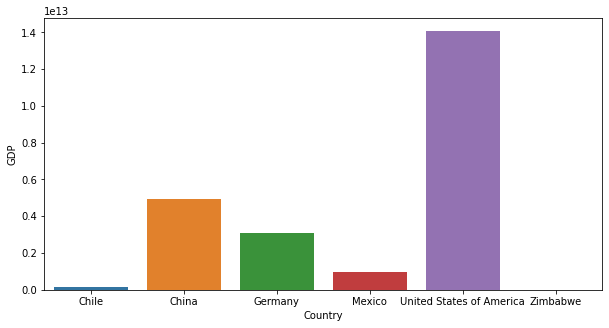

<Figure size 432x288 with 0 Axes>

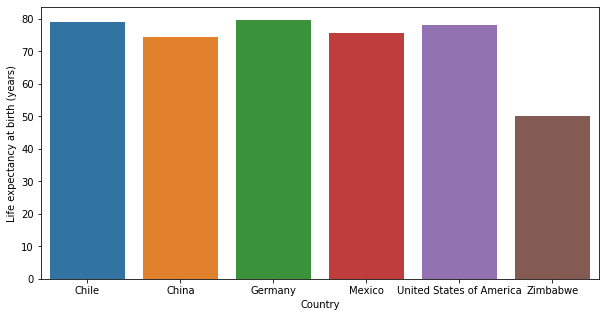

<Figure size 432x288 with 0 Axes>

In [63]:
#plt.figure(figsize=(10,5))
fig, ax_bar = plt.subplots(figsize=(10,5))
#fig.set_figwidth(10)
#fig.set_figheight(5)
g= sns.barplot(x='Country', y='GDP', data=df_group_country)
plt.show()
plt.clf()

plt.figure(figsize=(10,5))
g2 = sns.barplot(x='Country', y='Life expectancy at birth (years)', data=df_group_country)
plt.show()
plt.clf()

## Exploratory Data Analysis

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


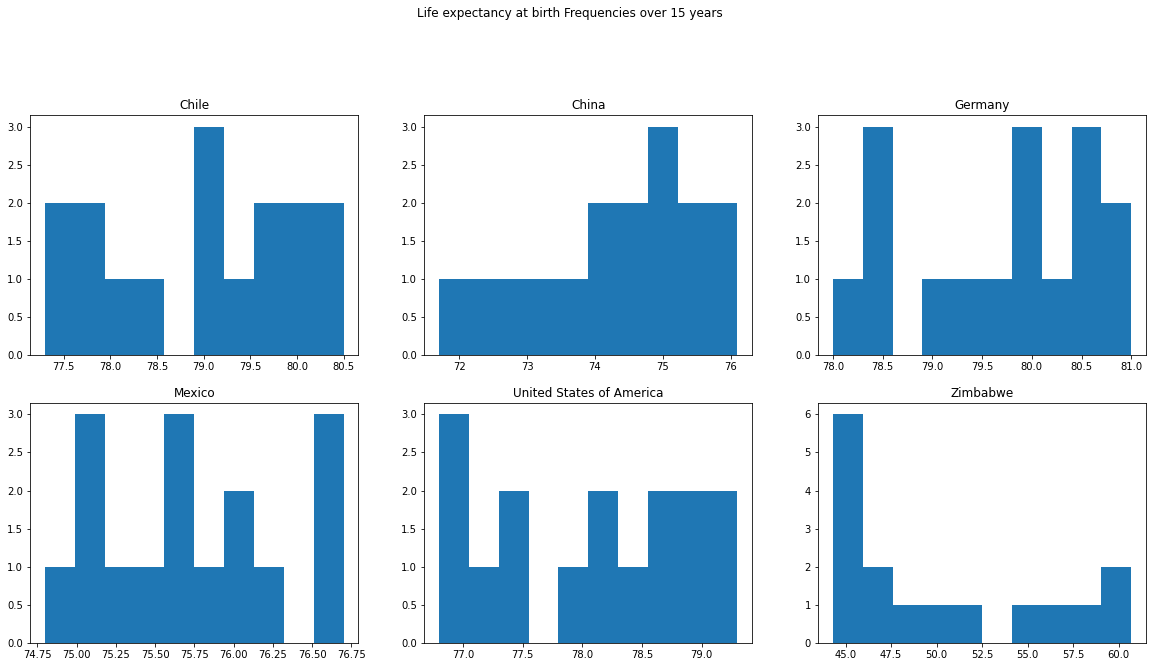

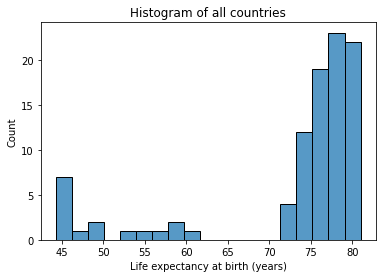

<Figure size 432x288 with 0 Axes>

In [60]:
#Show the distribution of Life Expectancy in each country
counter=1
unique_countries=df.Country.unique()

print(unique_countries)
plt.figure(figsize=(20,15))

for country in unique_countries:
    #print(country)
    df_country=df[df['Country'] == country]
    #print(df_country)
    #df.groupby('Country').mean()
    plt.subplot(3,3,counter)
    plt.title(country)
    plt.hist(df_country["Life expectancy at birth (years)"])
    counter+=1
plt.suptitle('Life expectancy at birth Frequencies over 15 years')
plt.show()
plt.clf()
    
plt.title('Histogram of all countries')
sns.histplot(df["Life expectancy at birth (years)"])
plt.show()
plt.clf()

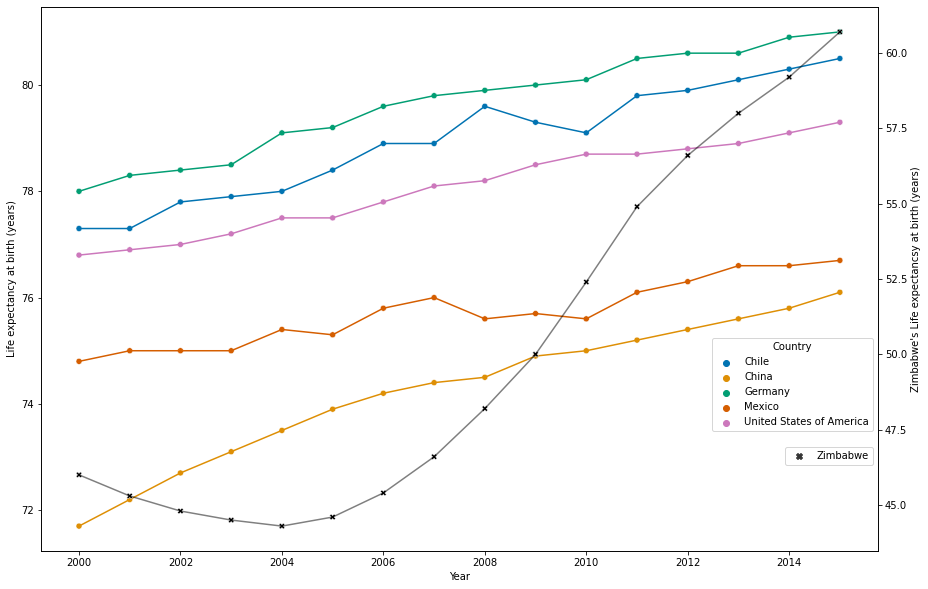

<Figure size 432x288 with 0 Axes>

In [5]:
#Show the life expectancy at birth in a time series plot for each country

plt.figure(figsize=(15,10))
ax=sns.scatterplot(x='Year', y='Life expectancy at birth (years)',data=df_minus_Zimbabwe, hue='Country',palette='colorblind')
sns.lineplot(x='Year', y='Life expectancy at birth (years)',data=df_minus_Zimbabwe, hue='Country',palette='colorblind',legend=False)
leg = ax.legend(bbox_to_anchor=(1, 0.4),title='Country') #labels=['Chile','China','Germany','Mexico','USA']
leg.texts[4]='USA'

ax2=ax.twinx()
sns.scatterplot(x='Year', y='Life expectancy at birth (years)',data=df_Zimbabwe, ax=ax2, style='Country', markers='X',color='#000000' ) #color='black'
sns.lineplot(x='Year', y='Life expectancy at birth (years)',data=df_Zimbabwe, ax=ax2,color='#000000',alpha=0.5, legend=False)
plt.ylabel("Zimbabwe's Life expectancsy at birth (years)")
plt.legend(bbox_to_anchor=(1, 0.2))
#ax3=plt.scatter(x=df_Zimbabwe.Year, y=df_Zimbabwe['Life expectancy at birth (years)'],c='black')
#plt.legend(loc='upper left') #This does not work for some reason, must be because it does not get applied to an error bar
#sns.lineplot(x='Year', y='Life expectancy at birth (years)',data=df, hue='Country')
plt.show()
plt.clf()


### Trends in Life Expectancy at Birth over a Decade

Construct [Here] a table of Average(median) Life Expectancy over time by each country

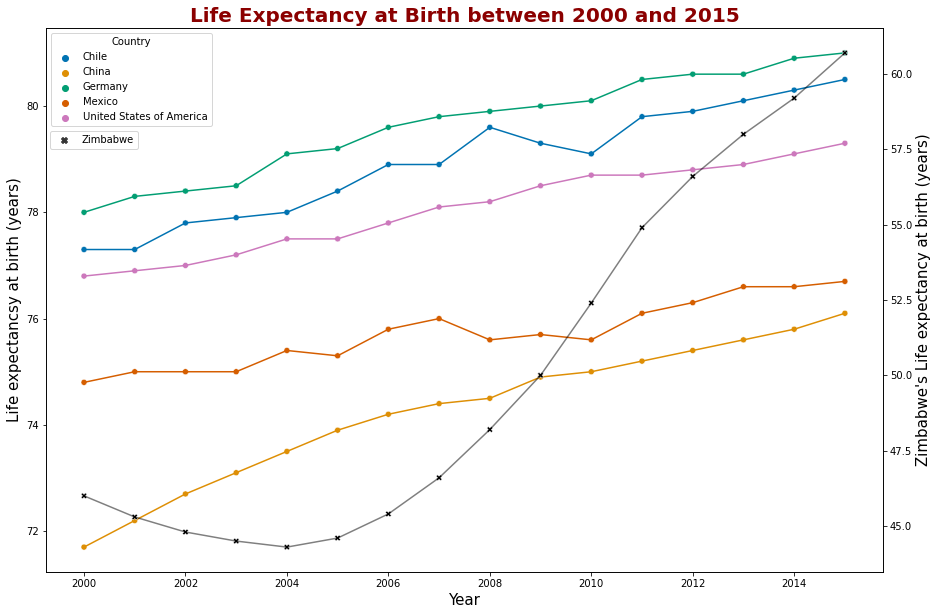

<Figure size 432x288 with 0 Axes>

In [6]:
#Alternative attempt

plt.figure(figsize=(15,10))
ax_1= plt.subplot()
ax_2=ax_1.twinx()

sns.scatterplot(x='Year', y='Life expectancy at birth (years)',data=df_minus_Zimbabwe,ax=ax_1, hue='Country',palette='colorblind')
sns.lineplot(x='Year', y='Life expectancy at birth (years)',data=df_minus_Zimbabwe,ax=ax_1, hue='Country',palette='colorblind',legend=False)

scat_ax=sns.scatterplot(x='Year', y='Life expectancy at birth (years)',data=df_Zimbabwe, ax=ax_2, style='Country', markers='X',color='#000000' ) #color='black'
lplot_ax=sns.lineplot(x='Year', y='Life expectancy at birth (years)',data=df_Zimbabwe, ax=ax_2,color='#000000',alpha=0.5, legend=False)

font1 = {
        'size': 15,
        }

ax_1.set_ylabel("Life expectancsy at birth (years)",fontdict=font1)
ax_1.set_xlabel('Year',fontdict=font1)
ax_2.set_ylabel("Zimbabwe's Life expectancy at birth (years)",fontdict=font1)
#plt.legend()
#ax_1.legend(labels=['Chile','China','Germany','Mexico','USA','Zimbabwe'])
ax_2.legend(bbox_to_anchor=(0.116, 0.82))

font2 = {
        'color':  'darkred',
        'weight': 'semibold',
        'size': 20,
        }
plt.title('Life Expectancy at Birth between 2000 and 2015',fontdict=font2)
plt.savefig('Life Expectancy at Birth between 2000 and 2015.png')
plt.show()
plt.clf()


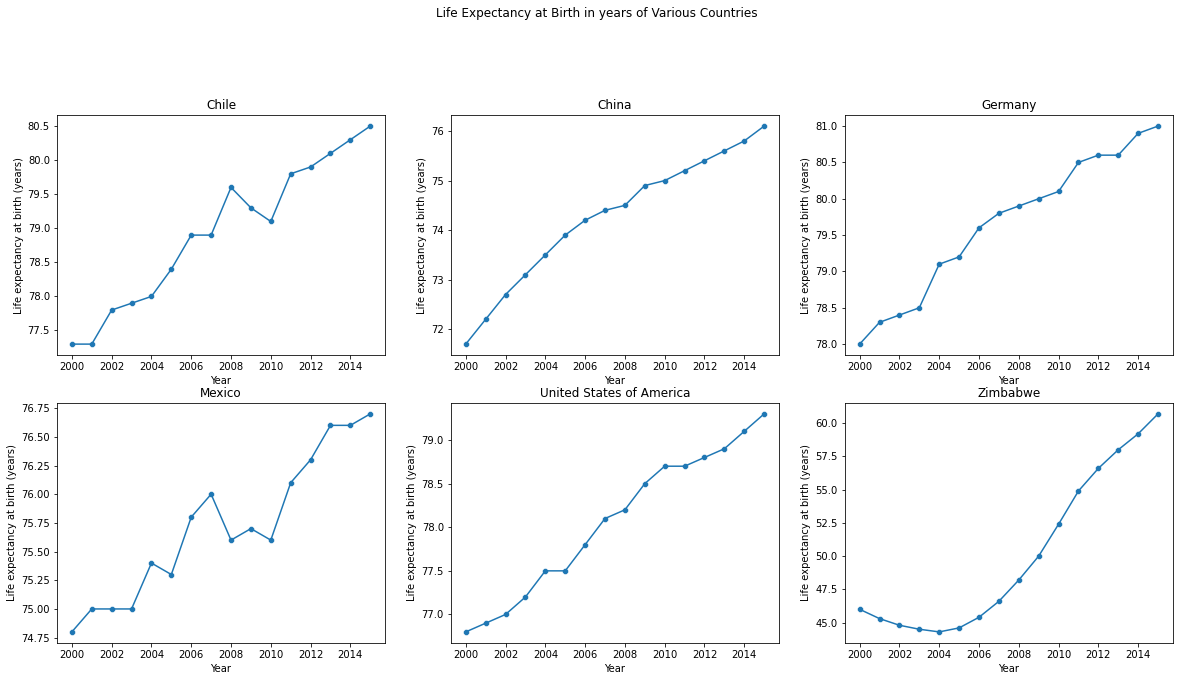

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [87]:
counter=1
plt.figure(figsize=(20,15))

for country in unique_countries:
    df_country=df[df['Country'] == country]
    plt.subplot(3,3,counter)
    plt.title(country)
    
    sns.scatterplot(x='Year', y='Life expectancy at birth (years)',data=df[df.Country == country])
    sns.lineplot(x='Year', y='Life expectancy at birth (years)',data=df[df.Country == country])
    counter+=1
plt.suptitle('Life Expectancy at Birth in years of Various Countries')
plt.show()
plt.clf()
    
plt.show()
plt.clf()

/var/folders/1j/ldj8bssd0vs37fj53rh82w9w66dp51/T/ipykernel_10006/939874721.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  scat_ax_b.set_yticklabels(ylabels_1)
/var/folders/1j/ldj8bssd0vs37fj53rh82w9w66dp51/T/ipykernel_10006/939874721.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  scat_ax_b.set_yticklabels(ylabels_1)
/var/folders/1j/ldj8bssd0vs37fj53rh82w9w66dp51/T/ipykernel_10006/939874721.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  scat_ax_b.set_yticklabels(ylabels_1)
/var/folders/1j/ldj8bssd0vs37fj53rh82w9w66dp51/T/ipykernel_10006/939874721.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  scat_ax_b.set_yticklabels(ylabels_1)
/var/folders/1j/ldj8bssd0vs37fj53rh82w9w66dp51/T/ipykernel_10006/939874721.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  scat_ax_b.set_yticklabels(ylabels_1)
/var/folders/1j/ldj8bssd0

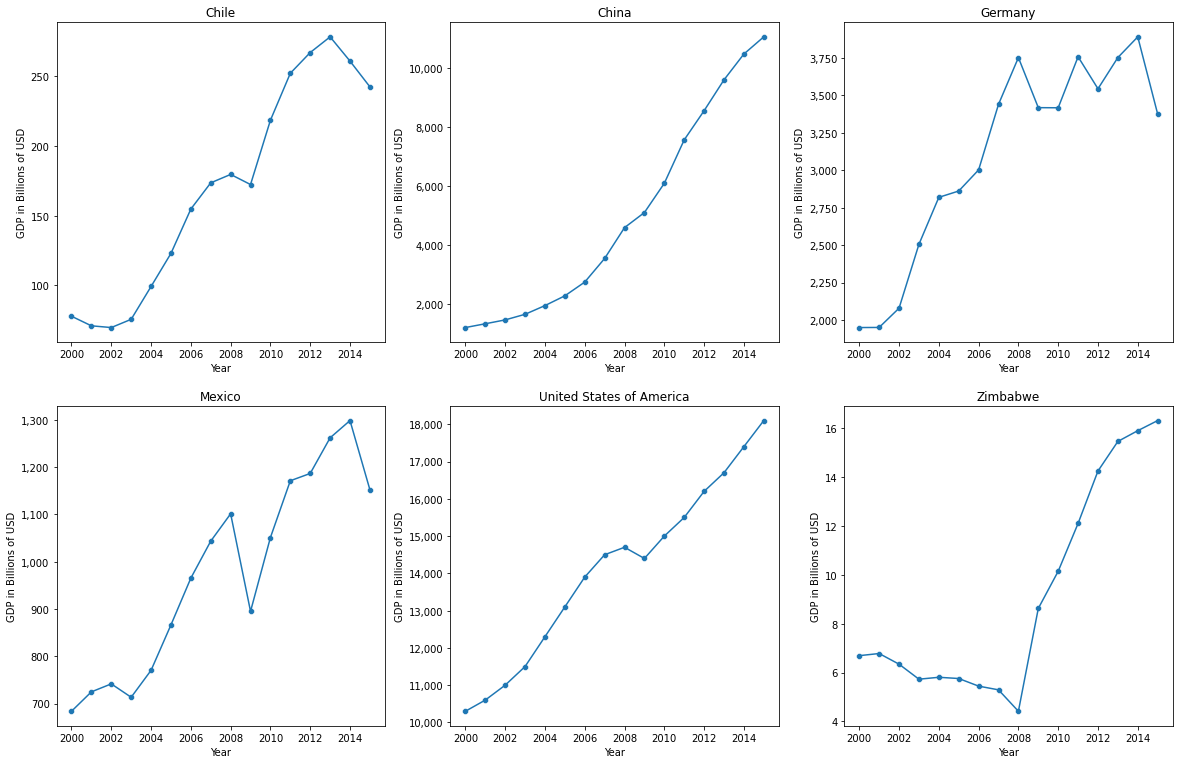

<Figure size 432x288 with 0 Axes>

In [8]:

#Plot Gross Domestic Product (GDP) change in a time-series graph for each country.
counter=1
plt.figure(figsize=(20,20))
for country in unique_countries:
    ax= plt.subplot(3,3,counter)
    sns.lineplot(x='Year',y='GDP', data=df[df.Country == country])
    scat_ax_b=sns.scatterplot(x='Year',y='GDP', data=df[df.Country == country])
    ylabels_1 = ['{:,.0f}'.format(y) for y in scat_ax_b.get_yticks()/(10**9)]
    scat_ax_b.set_yticklabels(ylabels_1)
    scat_ax_b.set_ylabel('GDP in Billions of USD')

    plt.title(country)
    counter+=1
plt.savefig('GDP change between 2000 and 2015.png')
plt.show()
plt.clf()






/var/folders/1j/ldj8bssd0vs37fj53rh82w9w66dp51/T/ipykernel_10006/2166278566.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  scat_ax_a.set_yticklabels(ylabels_1)
/var/folders/1j/ldj8bssd0vs37fj53rh82w9w66dp51/T/ipykernel_10006/2166278566.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  scat_ax_a.set_yticklabels(ylabels_1)
/var/folders/1j/ldj8bssd0vs37fj53rh82w9w66dp51/T/ipykernel_10006/2166278566.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  scat_ax_a.set_yticklabels(ylabels_1)
/var/folders/1j/ldj8bssd0vs37fj53rh82w9w66dp51/T/ipykernel_10006/2166278566.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  scat_ax_a.set_yticklabels(ylabels_1)
/var/folders/1j/ldj8bssd0vs37fj53rh82w9w66dp51/T/ipykernel_10006/2166278566.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  scat_ax_a.set_yticklabels(ylabels_1)
/var/folders/1j

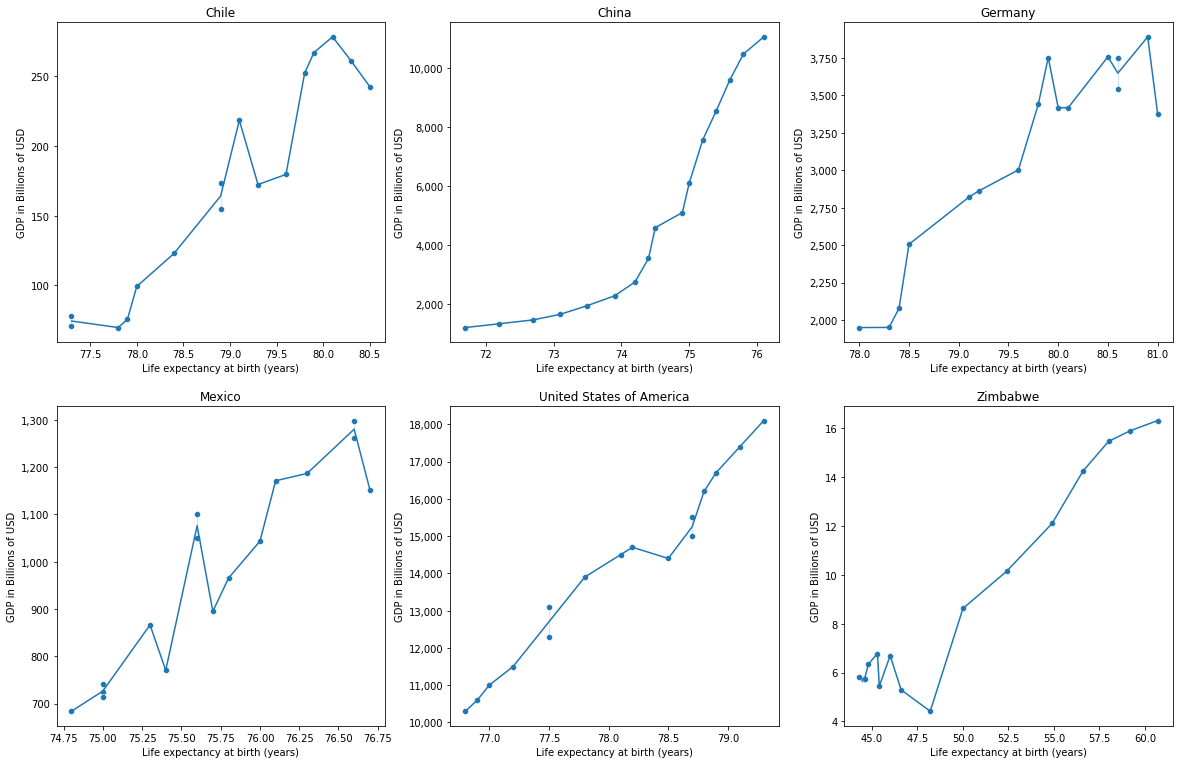

<Figure size 432x288 with 0 Axes>

In [9]:
#Plotting GDP vs life expectancy for each country
counter=1
plt.figure(figsize=(20,20))
#print(unique_countries)
countries_minus_Zimbabwe=unique_countries[unique_countries != 'Zimbabwe']
#print(countries_minus_Zimbabwe)
for country in unique_countries:
    ax= plt.subplot(3,3,counter)
    sns.lineplot(x='Life expectancy at birth (years)',y='GDP', data=df[df.Country == country])
    scat_ax_a=sns.scatterplot(x='Life expectancy at birth (years)',y='GDP', data=df[df.Country == country])
    ylabels_1 = ['{:,.0f}'.format(y) for y in scat_ax_a.get_yticks()/(10**9)]
    scat_ax_a.set_yticklabels(ylabels_1)
    scat_ax_a.set_ylabel('GDP in Billions of USD')

    plt.title(country)
    #ax.yaxis.set_major_formatter(FormatStrFormatter('%2.2e'))
    counter+=1
plt.savefig('Gross Domestic Product in relation to Life Expectancy.png')
plt.show()
plt.clf()

/var/folders/1j/ldj8bssd0vs37fj53rh82w9w66dp51/T/ipykernel_10006/3276353767.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  scat.set_yticklabels(ylabels)
/var/folders/1j/ldj8bssd0vs37fj53rh82w9w66dp51/T/ipykernel_10006/3276353767.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  scat2.set_yticklabels(ylabels2)


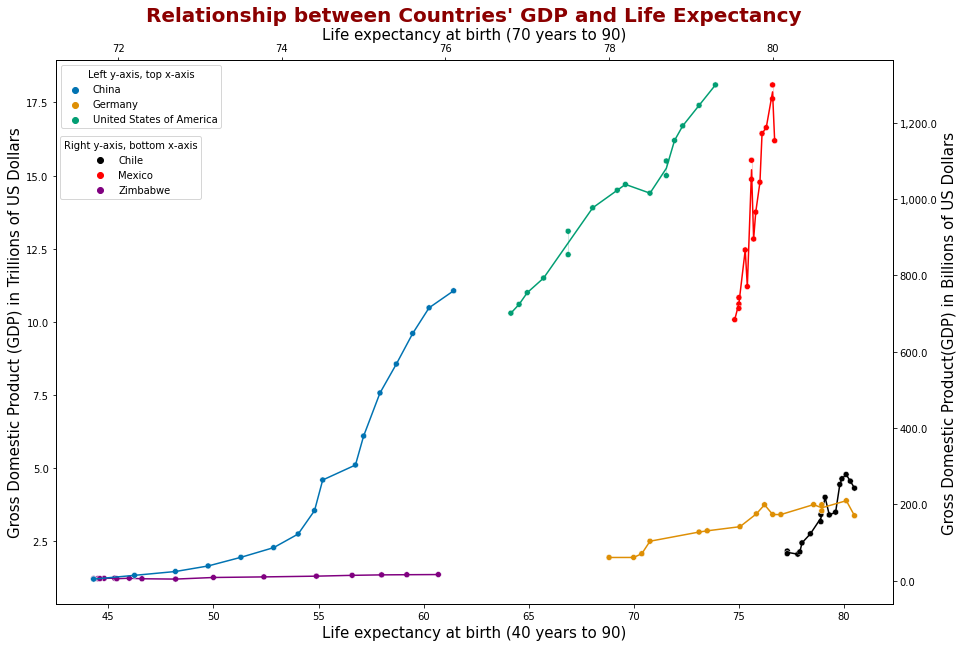

<Figure size 432x288 with 0 Axes>

In [10]:
# GDP vs Life Expectancy plot overall

#Font configurations to be used for axis texts
font3 = {
        'size': 15,
        }


plt.figure(figsize=(15,10))
ax3= plt.subplot()
ax4=ax3.twinx()
ax5=ax3.twiny()

#List of countries
lst1=['United States of America','China','Germany']

#Scatter and line plots of countries on the primary y(left) and x(bottom) axes
scat= sns.scatterplot(x='Life expectancy at birth (years)',y='GDP', data=df[df.Country.isin(lst1)], hue='Country',palette='colorblind')
lplot= sns.lineplot(x='Life expectancy at birth (years)',y='GDP', data=df[df.Country.isin(lst1)], hue='Country', palette='colorblind',legend= False)
ax3.set_ylabel("Gross Domestic Product (GDP) in Trillions of US Dollars", fontdict=font3)
ax3.set_xlabel("Life expectancy at birth (40 years to 90)", fontdict=font3)
scat.legend(title='Left y-axis, top x-axis', loc='upper left')
ylabels = ['{:,.1f}'.format(y) for y in scat.get_yticks()/(10**12)]
#ax3.set_xlim(40,65) #When I apply this filter Chile and Mexico disappear from the chart because they both have a higher GDP compared to Zimb's lower life exp.
scat.set_yticklabels(ylabels)

#Scatter and line plots of countries on the secondary y(right) and x(top) axes
#List of countries
lst2=['Chile','Mexico','Zimbabwe']

scat2= sns.scatterplot(x='Life expectancy at birth (years)',y='GDP', data=df[df.Country.isin(lst2)], hue='Country', palette=['black','red','purple'],ax=ax4)
lplot2= sns.lineplot(x='Life expectancy at birth (years)',y='GDP', data=df[df.Country.isin(lst2)], hue='Country', palette=['black','red','purple'],ax=ax4,legend=False)
ax4.set_ylabel("Gross Domestic Product(GDP) in Billions of US Dollars", fontdict=font3)
ax5.set_xlabel("Life expectancy at birth (70 years to 90)", fontdict=font3)
legend=scat2.legend(title='Right y-axis, bottom x-axis', bbox_to_anchor=(0.18, 0.87))
ylabels2 = ['{:,.1f}'.format(y2) for y2 in scat2.get_yticks()/(10**9)]
scat2.set_yticklabels(ylabels2)


#Font configurations to be used for the title
font4 = {
        'color':  'darkred',
        'weight': 'semibold',
        'size': 20,
        }
plt.title("Relationship between Countries' GDP and Life Expectancy",fontdict=font4)

plt.savefig("Relationship between Countries' GDP and Life Expectancy.png")
plt.show()
plt.clf()



In [ ]:
#GDP and Life Expectancy boxplots for each country
plt.figure(figsize=(20,5))
sns.boxplot(x='Country',y='Life expectancy at birth (years)',data=df)
plt.show()
plt.clf()

plt.figure(figsize=(20,5))
sns.boxplot(x='Country',y='GDP',data=df)
plt.show()
plt.clf()

plt.figure(figsize=(20,5))
sns.violinplot(x='Country',y='Life expectancy at birth (years)',data=df)
plt.show()
plt.clf()

plt.figure(figsize=(20,5))
sns.violinplot(x='Country',y='GDP',data=df[df.Country=='Zimbabwe'])
plt.show()
plt.clf()

ax_ov=sns.scatterplot(x='Life expectancy at birth (years)', y='GDP',data=df)
ax_ov.set_xlim(70,82.5)
plt.show()
plt.clf()